In [1]:
import numpy as np
import json
import os
from tqdm import tqdm

### List all bots

In [2]:
path = "../game_logs/historical_games_extended"

bots = []
for game_id in tqdm(os.listdir(path)):
    game = json.load(open(os.path.join(path, game_id), 'r'))
    bots.append(game["white_name"])
    bots.append(game["black_name"])

bots = np.unique(bots, return_counts=True)

100%|██████████| 15978/15978 [00:19<00:00, 809.85it/s]


In [3]:
bots

(array(['Châteaux', 'DynamicEntropy', 'Fianchetto', 'Frampt',
        'GarrisonNRL', 'Gnash', 'JKU-CODA', 'Kevin', 'Marmot', 'Oracle',
        'ROOKie', 'SomeRegret', 'StrangeFish2', 'URChIn', 'ai_games_cvi',
        'arandombot', 'armandli', 'attacker', 'callumcanavan', 'penumbra',
        'random', 'srcork', 'trout', 'uccch', 'uccchess', 'wbernar5'],
       dtype='<U14'),
 array([ 913, 1888, 1906,  981, 1894,  966,  897, 1843, 1836, 1907,  922,
         884, 1897,  929,  503,  444,  982, 1906,  981,  969, 1906,  451,
        1907,  443,  818,  983], dtype=int64))

## Bot distributions

In [4]:
data = {
    bot: []
    for bot in bots[0]
}

for game_id in tqdm(os.listdir(path)):
    game = json.load(open(os.path.join(path, game_id), 'r'))
    for color in [True, False]:
        bot = game["white_name"] if color else game["black_name"]
        if game["post_sense_uncertainty"]["true" if color else "false"]:
            data[bot] += list(enumerate(game["post_sense_uncertainty"]["true" if color else "false"]))

100%|██████████| 15978/15978 [00:06<00:00, 2387.53it/s]


In [14]:
import matplotlib.pyplot as plt

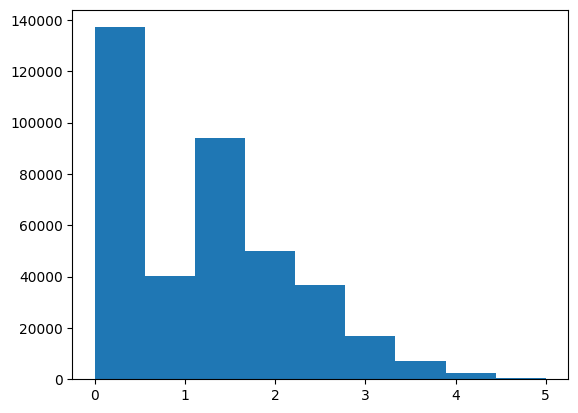

In [15]:
plt.hist([np.log10(x[1]) for y in data.values() for x in y], bins=np.linspace(0, 5, 10))
plt.show()

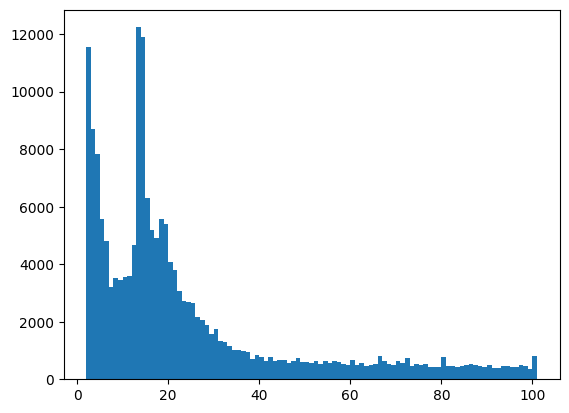

In [30]:
plt.hist([x[1] for y in data.values() for x in y], bins=np.arange(100)+2)
plt.show()

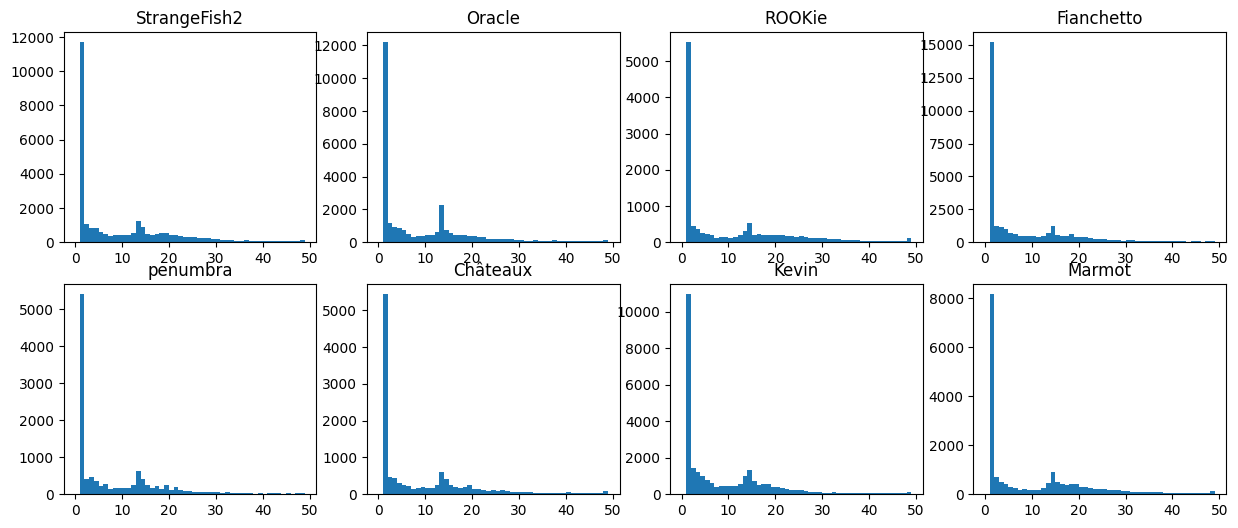

In [32]:
fig, axs = plt.subplots(2, 4, figsize=(15, 6))

# fig.set_figsize(15, 9)

graph_bots = ['StrangeFish2', 'Oracle', 'ROOKie', 'Fianchetto', 'penumbra', 'Châteaux', 'Kevin', 'Marmot']

for i, ax in enumerate(np.array(axs).flat):
    bot = graph_bots[i]
    # ax.hist([np.log10(x[1]) for x in data[bot]], bins=np.linspace(0, 5, 10))
    ax.hist([x[1] for x in data[bot]], bins=np.arange(50))
    ax.set_title(bot)

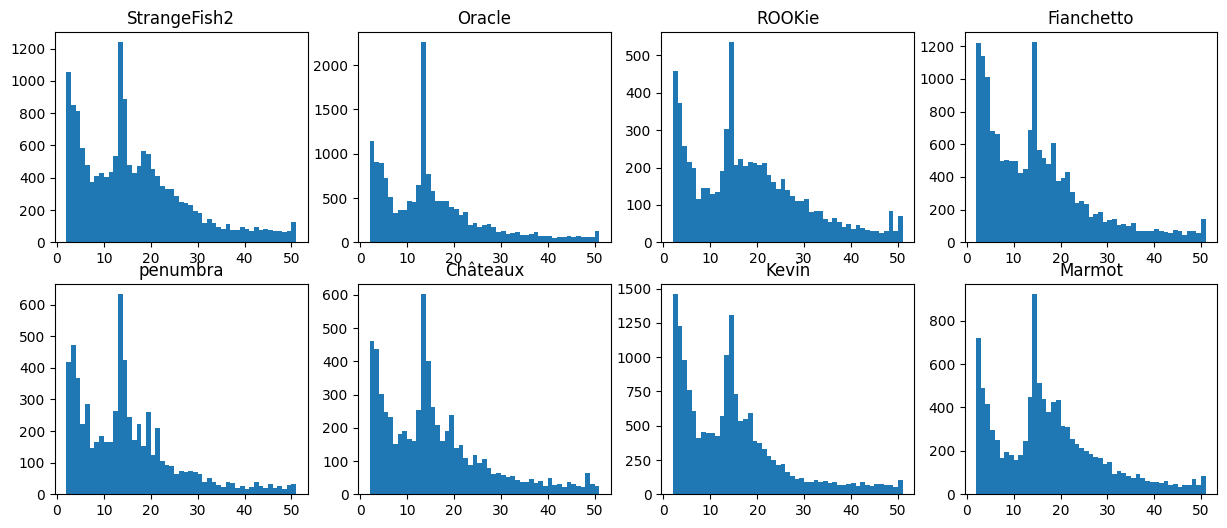

In [27]:
fig, axs = plt.subplots(2, 4, figsize=(15, 6))

# fig.set_figsize(15, 9)

graph_bots = ['StrangeFish2', 'Oracle', 'ROOKie', 'Fianchetto', 'penumbra', 'Châteaux', 'Kevin', 'Marmot']

for i, ax in enumerate(np.array(axs).flat):
    bot = graph_bots[i]
    # ax.hist([np.log10(x[1]) for x in data[bot]], bins=np.linspace(0, 5, 10))
    ax.hist([x[1] for x in data[bot]], bins=np.arange(50)+2)
    ax.set_title(bot)

In [22]:
# fig, axs = plt.subplots(2, 4, figsize=(15, 6))

# fig.set_figsize(15, 9)

graph_bots = ['StrangeFish2', 'Oracle', 'ROOKie', 'Fianchetto', 'penumbra', 'Châteaux', 'Kevin', 'Marmot']

for bot in graph_bots:
    # bot = graph_bots[i]
    # ax.hist([np.log10(x[1]) for x in data[bot]], bins=np.linspace(0, 5, 10))
    # ax.hist([x[1] for x in data[bot]], bins=np.arange(50))
    if len([x[1] for x in data[bot]]):
        print(f"{bot}: {len([x[1] for x in data[bot] if x[1] == 1]) / len([x[1] for x in data[bot]])}")

StrangeFish2: 0.2802175423464865
Oracle: 0.32682050869716706
ROOKie: 0.28605470368835473
Fianchetto: 0.3630367768298803
penumbra: 0.34231208011154773
Châteaux: 0.33680297397769515
Kevin: 0.3090119067772699
Marmot: 0.2756200438670491


## Average in duration

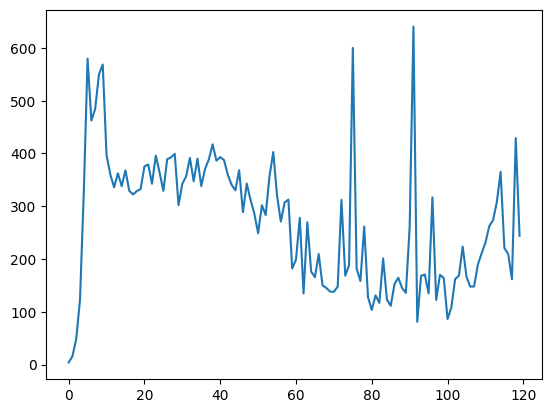

In [101]:
values = [x for y in data.values() for x in y]
size = max([x[0] for x in values]) + 1

arr = [[] for _ in range(size)]
counts = np.zeros(size)
for val in values:
    arr[val[0]].append(val[1])
    counts[val[0]] += 1
    
res = np.array([np.quantile(vals, [0.1, 0.5, 0.9]) for vals in arr])

res2 = np.array([np.mean(vals) for vals in arr])

mx = 120

plt.plot(np.arange(mx), res2[:mx])
# plt.plot(np.arange(mx), res[:mx, 1])
plt.show()

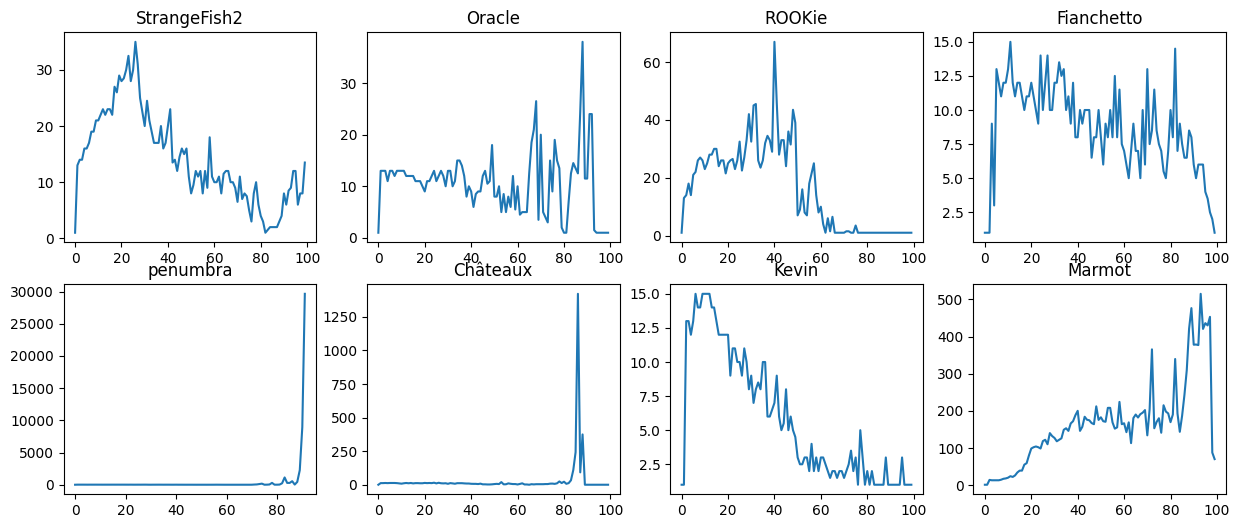

In [33]:
fig, axs = plt.subplots(2, 4, figsize=(15, 6))

graph_bots = ['StrangeFish2', 'Oracle', 'ROOKie', 'Fianchetto', 'penumbra', 'Châteaux', 'Kevin', 'Marmot']

for i, ax in enumerate(np.array(axs).flat):
    bot = graph_bots[i]
    values = [x for x in data[bot]]
    size = max([x[0] for x in values]) + 1
    
    arr = [[] for _ in range(size)]
    counts = np.zeros(size)
    for val in values:
        arr[val[0]].append(val[1])
        counts[val[0]] += 1
        
    res = np.array([np.quantile(vals, [0.1, 0.5, 0.9]) for vals in arr])
    
    res2 = np.array([np.median(vals) for vals in arr])
    
    mx = 100
    
    ax.plot(np.arange(min(mx, len(res2))), res2[:mx])
    ax.set_title(bot)
    # plt.plot(np.arange(mx), res[:mx, 1])
plt.show()